<a href="https://colab.research.google.com/github/aniqohhana/VolunterPembuatanAplikasi/blob/main/Pizza_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
# load csv into a dataframe
df = pd.read_csv('/content/drive/MyDrive/pizza.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp155,000",14.0,smoked beef,NaN,reguler,yes,no


In [ ]:
# get the number of rows and columns
df.shape

(136, 8)

The dataset has 136 records and 8 columns.

In [ ]:
# check data types for each columns
df.dtypes

company          object
price_rupiah     object
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

All columns are categorical variables, except 'diameter' column.

In [ ]:
# check any missing values in the dataset
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         1
variant         1
size            1
extra_sauce     5
extra_cheese    0
dtype: int64

All columns that have missing values are categorical variables. So, we will fill missing values with the most frequent value of each columns.

In [ ]:
# check the most frequent value in 'topping' feature
df.groupby('topping').count()

,company,price_rupiah,diameter,variant,size,extra_sauce,extra_cheese
topping,,,,,,,
beef,3,3,3,3,3,3,3
black papper,3,3,3,3,3,3,3
chicken,32,32,32,32,32,32,32
meat,9,9,9,9,9,9,9
mozzarella,22,22,22,22,22,22,22
mushrooms,22,22,22,22,22,22,22
onion,1,1,1,1,1,1,1
papperoni,2,2,2,2,2,2,2
sausage,4,4,4,4,4,4,4


In [ ]:
# check the most frequent value in 'variant' feature
df.groupby('variant').count()

,company,price_rupiah,diameter,topping,size,extra_sauce,extra_cheese
variant,,,,,,,
BBQ_meat_fiesta,6,6,6,6,6,6,6
BBQ_sausage,4,4,4,4,4,4,4
american_classic,3,3,3,3,3,3,3
american_favorite,5,5,5,5,5,5,5
classic,32,32,32,32,32,32,32
crunchy,12,12,12,12,12,12,12
double_decker,9,9,9,9,9,9,9
double_mix,10,10,10,10,10,10,10
double_signature,5,5,5,5,5,5,5


In [ ]:
# check the most frequent value in 'size' feature
df.groupby('size').count()

,company,price_rupiah,diameter,topping,variant,extra_sauce,extra_cheese
size,,,,,,,
XL,10,10,10,10,10,10,10
jumbo,15,15,15,15,15,15,15
large,22,22,22,22,22,22,22
medium,44,44,44,44,44,44,44
reguler,22,22,22,22,22,22,22
small,23,23,23,23,23,23,23


In [ ]:
# check the most frequent value in 'extra_sauce' feature
df.groupby('extra_sauce').count()

,company,price_rupiah,diameter,topping,variant,size,extra_cheese
extra_sauce,,,,,,,
no,54,54,54,54,54,54,54
yes,82,82,82,82,82,82,82


In [ ]:
# fill missing value with the most frequent value of each columns
df['topping'] =df['topping'].fillna("chicken")
df['variant'] =df['variant'].fillna("classic")
df['size'] =df['size'].fillna("medium")
df['extra_sauce'] =df['extra_sauce'].fillna("yes")

In [ ]:
# re-check any missing values in the dataset
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

No missing values.

In [ ]:
# check any duplicate row
duplicate_rows = df[df.duplicated()]
print("Duplicate rows: ")
duplicate_rows

Duplicate rows: 


,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
19,A,"Rp70,000",8.0,chicken,meat_lovers,reguler,yes,yes
51,B,"Rp83,000",17.0,chicken,new_york,XL,no,yes
95,D,"Rp23,500",8.5,mozzarella,classic,small,yes,no
116,E,"Rp115,000",17.0,mozzarella,new_york,XL,no,yes
128,E,"Rp83,000",17.0,chicken,new_york,XL,no,yes


The dataset consists 5 duplicate rows, we need to remove.

In [ ]:
# drop duplicate row
df.drop_duplicates()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp155,000",14.0,smoked beef,classic,reguler,yes,no
...,...,...,...,...,...,...,...,...
131,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
132,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
133,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
134,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


We can see the shape of dataset was changed, becomes 131 records and 8 columns. It means five duplicate rows was removed.

In [ ]:
df['price_rupiah'].head()

0    Rp235,000
1    Rp198,000
2    Rp120,000
3    Rp155,000
4    Rp155,000
Name: price_rupiah, dtype: object

In [ ]:
# removing string & special character in price column & convert into 'int64'
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','').str.replace(',','')
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])

In [ ]:
# re-check the data types of 'price_rupiah' column
df['price_rupiah'].dtypes

dtype('int64')

In [ ]:
# feature engineering
# encode label
EN =LabelEncoder()
df['company'] = EN.fit_transform(df['company'])
df['topping'] = EN.fit_transform(df['topping'])
df['variant'] = EN.fit_transform(df['variant'])
df['size'] = EN.fit_transform(df['size'])
df['extra_sauce'] = EN.fit_transform(df['extra_sauce'])
df['extra_cheese'] = EN.fit_transform(df['extra_cheese'])

df.sample(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
20,0,90000,12.0,5,13,4,1,1
115,4,75000,12.0,5,5,3,0,1
46,1,75000,8.5,9,4,5,1,1
14,0,90000,12.0,1,18,4,0,1
74,2,84000,14.0,11,11,2,1,1


In [ ]:
# # evaluate the relationship variables with correlation matrix
cormat = df.corr()
round(cormat,2)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
company,1.00,-0.30,-0.17,0.00,-0.12,0.01,-0.04,0.02
price_rupiah,-0.30,1.00,0.82,-0.04,0.13,-0.54,0.09,0.01
diameter,-0.17,0.82,1.00,-0.15,0.18,-0.83,-0.08,0.06
topping,0.00,-0.04,-0.15,1.00,0.24,0.13,0.04,-0.01
variant,-0.12,0.13,0.18,0.24,1.00,-0.25,-0.05,0.28
size,0.01,-0.54,-0.83,0.13,-0.25,1.00,0.23,-0.14
extra_sauce,-0.04,0.09,-0.08,0.04,-0.05,0.23,1.00,-0.12
extra_cheese,0.02,0.01,0.06,-0.01,0.28,-0.14,-0.12,1.00


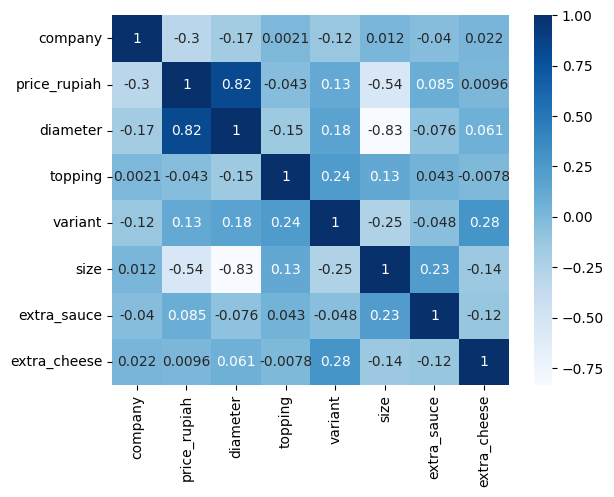

In [ ]:
# evaluate the relationship variables with heatmap
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

'Diameter' feature has strong correlation with 'price_rupiah' feature.

In [ ]:
# split data dependent and independent
x = df.drop(columns='price_rupiah')
y = df['price_rupiah']

In [ ]:
# create model
reg = LinearRegression()

# split data into train, validation, and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (108, 7)
the shape of the training set (target) is: (108,)

the shape of the test set (input) is: (28, 7)
the shape of the test set (target) is: (28,)


In [ ]:
# fit model to the training data
reg = reg.fit(x_train,y_train)
print(reg)

LinearRegression()


In [ ]:
# apply the model to the test set
y_pred = reg.predict(x_test)
print(y_pred)

[ 67006.88226055  76005.89337827 143842.91418188 143895.74346266
  97218.50298125  90601.10006393  41581.5979515  118352.61658091
  50968.84964212  91571.66697105  40242.29195667  74163.28590151
 116290.29888256  45918.83854816 200171.5767907   68698.67095939
  51549.23789885  38840.93091051  74966.13032257 150858.51937911
 100484.57823206 149462.82512931  78562.11879336 114370.85099964
 120748.1233114  107063.62858075  35732.08974249  95186.03017883]


In [ ]:
# compare actual value with predict value
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['Predicted Price'] = y_pred
df_test_set.sample(5)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price_rupiah,Predicted Price
53,2,8.5,10,17,5,1,1,39000,50968.849642
69,2,8.5,11,10,5,0,0,44000,40242.291957
118,4,8.5,2,4,5,0,1,33000,35732.089742
17,0,16.0,9,13,1,0,1,110000,118352.616581
44,1,17.0,5,15,0,1,0,119000,116290.298883


<function matplotlib.pyplot.legend(*args, **kwargs)>

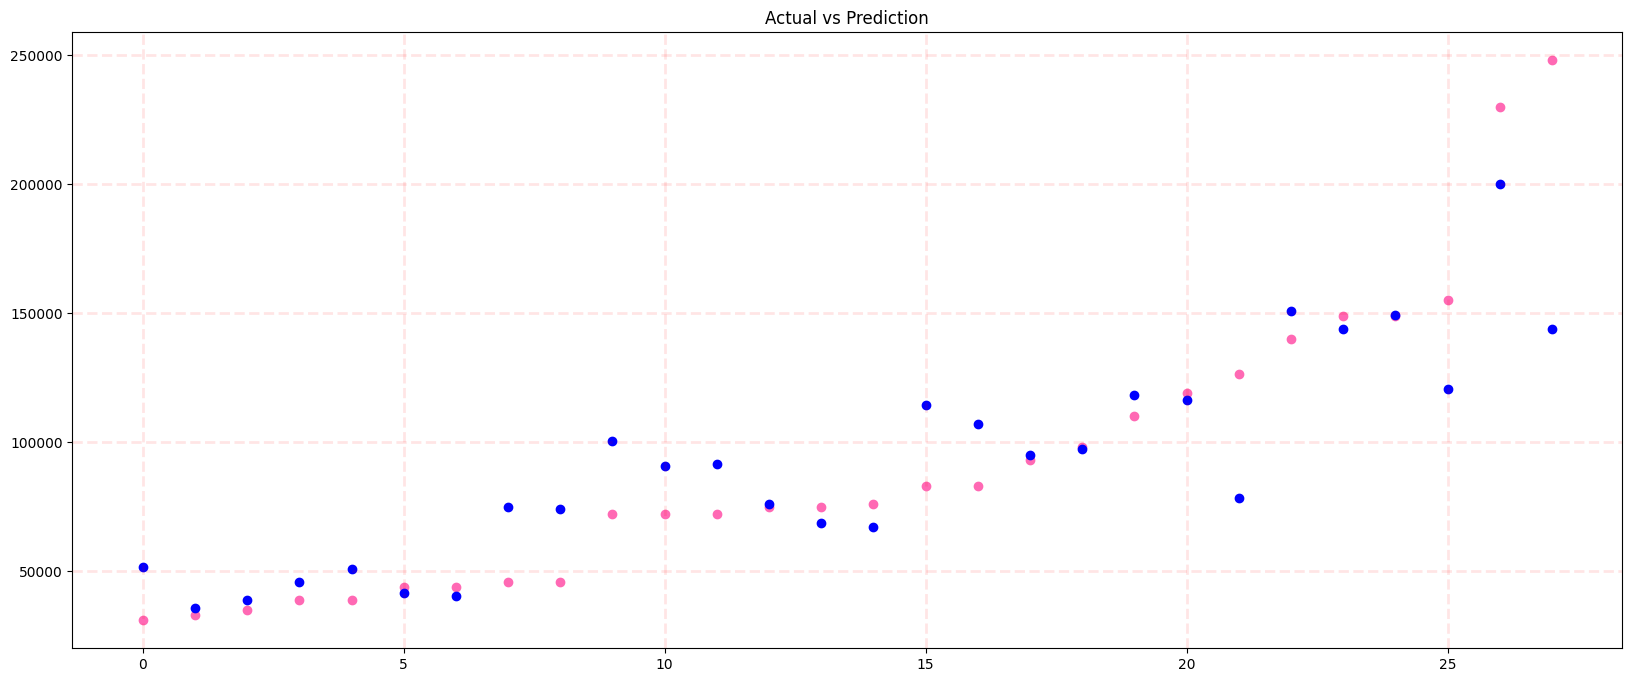

In [ ]:
# visualize actual values and predicted values
plt.figure(figsize=(20,8))

# sorted ascending
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())
prediction_sorted = y_pred[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label = 'Actual Price', color = 'hotpink')
plt.scatter(np.arange(0,len(y_sorted)), prediction_sorted, label = 'Predicted Price', color = 'blue')
plt.grid(color='red', alpha=0.1, linestyle='--', linewidth=2)
plt.title("Actual vs Prediction")
plt.legend

In [ ]:
# evaluate the model
print("Training Model:", reg.score(x_train,y_train))
print("Testing Model:", reg.score(x_test,y_test))

accuracy=r2_score(y_test,y_pred)*100
print("The accuracy of the model is %.2f" %accuracy)

Training Model: 0.7546609044795104
Testing Model: 0.7552003839746559
The accuracy of the model is 75.52
